# 1. 2D
## 1.1. Dispersion relation of bulk
### 1.1.1. inertial frame of reference

(84, 73, 4) (84, 73, 4, 4)


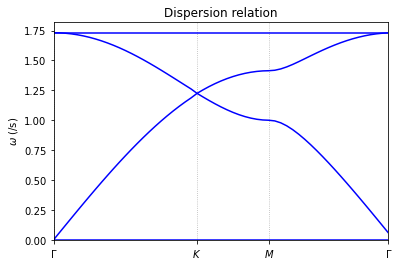

In [167]:
import numpy as np
import numpy.linalg as la



C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
precision = 1e-1
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 4), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 4, 4), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        H = w0**2 * np.vstack([
            np.hstack([R11 + R22 + R33, -(R11 + R22 * p.conj() + R33 * s.conj())]),
            np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33]),
        ])
        evals, evecs = la.eigh(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)


# 3D dispersion
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = plt.axes(projection='3d')
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(np.sqrt(evals_all[:, :, 2]).real)
ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 1]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
p = ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 2]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

ax.set_xlabel(r"$k_x$ (/m)")
ax.set_xlim(-xw, xw)
ax.set_ylabel(r"$k_y$ (/m)")
ax.set_ylim(-yw, yw)
ax.set_zlabel(r"$\omega$ (/s)")
ax.set_zlim(0)

fig.colorbar(p, pad=0.12)
# fig.savefig("2d-dispersion.png")
plt.show()


# Contour plot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
fig, ax = plt.subplots()
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(np.sqrt(evals_all[:, :, 2]).real)
cs = plt.contour(X, Y, np.sqrt(evals_all[:, :, 2]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

plt.xlabel(r"$k_x$ (/m)")
plt.xlim(-xw, xw)
plt.ylabel(r"$k_y$ (/m)")
plt.ylim(-yw, yw)


norm= colors.Normalize(vmin=0., vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cs.cmap)
sm.set_array([])
fig.colorbar(sm)
# fig.savefig("2d-dispersion.png")
plt.show()


# Dispersion relation G1 -> K -> M -> G2
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
G = np.array([[0.], [0.]])
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
M = a1_ / 2

GK = (K - G)
KM = (M - K)
MG = (G - M)
gk = GK / la.norm(GK)
km = KM / la.norm(KM)
mg = MG / la.norm(MG)
num_gk = int(la.norm(GK) / precision)
num_km = int(la.norm(KM) / precision)
num_mg = int(la.norm(MG) / precision) + 1
kxs = np.hstack([
    [gk[0,0] * precision * i for i in range(num_gk)],
    [km[0,0] * precision * i + GK[0,0] for i in range(num_km)],
    [mg[0,0] * precision * i + GK[0,0] + KM[0,0] for i in range(num_mg)]
])
kys = np.hstack([
    [gk[1,0] * precision * i for i in range(num_gk)],
    [km[1,0] * precision * i + GK[1,0] for i in range(num_km)],
    [mg[1,0] * precision * i + GK[1,0] + KM[1,0] for i in range(num_mg)]
])


evals_all = []
for ky, kx in zip(kys, kxs):
    k = np.array([kx, ky])
    p = np.exp(1.j * k.dot(a1))
    s = np.exp(1.j * k.dot(a2))
    H = w0**2 * np.vstack([
        np.hstack([R11 + R22 + R33, -(R11 + R22 * p.conj() + R33 * s.conj())]),
        np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33]),
    ])
    evals, evecs = la.eigh(H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
evals_all = np.array(evals_all, dtype=np.complex128)


import matplotlib.pyplot as plt
# fig = plt.figure()
dr = np.arange(0, precision * len(kxs), precision)
for i in range(4):
    plt.plot(dr, np.sqrt(evals_all[:, i]).real, color='blue')
plt.title("Dispersion relation")

xticks = [
    0, 
    num_gk * precision, 
    num_gk * precision + num_km * precision, 
    num_gk * precision + num_km * precision + (num_mg - 1) * precision
]
xlabels = [r"$\Gamma$", r"$K$", r"$M$", r"$\Gamma$"]
plt.xticks(xticks, xlabels)
plt.xlabel(r"")
plt.grid(axis='x', linestyle='dotted')
plt.xlim(0, max(dr))
plt.ylabel(r"$\omega$ (/s)")
plt.ylim(0)
plt.show()
# fig.savefig("1d-dispersion.png")

### 1.1.2. Coriolis

In [ ]:
import numpy as np
import numpy.linalg as la



C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
precision = 0.1
width = np.pi / np.sqrt(3) * 2
kxs = np.arange(-width, width, precision)
kys = np.arange(-width, width, precision)


evals_all = np.zeros((len(kys), len(kxs), 4), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 4, 4), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        H = w0**2 * np.vstack([
            np.hstack([R11 + R22 + R33, -(R11 + R22 * p.conj() + R33 * s.conj())]),
            np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33]),
        ])
        evals, evecs = la.eigh(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)



### 1.1.3. + centrifugal, transverse

## 1.2. Dispersion relation of ribbon
### 1.2.1 inertial frame of reference

(37, 36) (37, 36, 36)


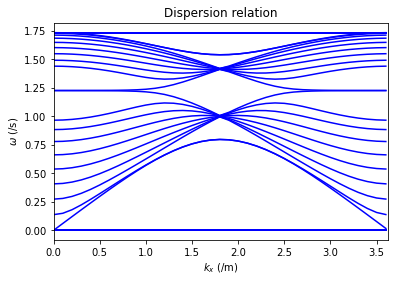

In [75]:
import numpy as np
import numpy.linalg as la

# Experimental setup
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
xmax = np.pi / np.sqrt(3) * 2
precision = 0.1
kxs = np.arange(0, xmax, precision) 


# System specific parameters
N = 9 # number of unit cells

evals_all, evecs_all  = [], []
for kx in kxs:
    k = np.array([kx, 0.])
    p = np.exp(1.j * k.dot(a1))

    # BUild Hamiltonian
    H = np.zeros((N * 2 * 2, N * 2 * 2), dtype=np.complex128)
    for i in range(0, N * 2 * 2 - 2, 2):
        if (i / 2) % 2 == 0:
            H[i:i+2, i+2:i+4] = -R11 - R22 * p
        else:
            H[i:i+2, i+2:i+4] = -R33
    H = H + H.conj().T
    for i in range(0, N * 2 * 2, 2):
        H[i:i+2, i:i+2] = R11 + R22 + R33

    # Solve eigenvalue equation
    evals, evecs = la.eigh(w0**2 * H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all, evecs_all = np.array(evals_all, dtype=np.complex128), np.array(evecs_all, dtype=np.complex128)
print(evals_all.shape, evecs_all.shape)


import matplotlib.pyplot as plt
# fig = plt.figure()
for i in range(evals_all.shape[1]):
    plt.plot(kxs, np.sqrt(evals_all[:, i]).real, color='blue')
plt.title(r"Dispersion relation")
plt.xlabel(r"$k_x$ (/m)")
plt.xlim(0, xmax)
plt.ylabel(r"$\omega$ (/s)")
plt.show()
# fig.savefig("1d-dispersion-coriolis-06.png")

### 1.2.2. Coriolis 

In [ ]:
import numpy as np
import numpy.linalg as la

# Experimental setup
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
xmax = np.pi / np.sqrt(3) * 2
precision = 0.1
kxs = np.arange(0, xmax, precision) 


# System specific parameters
N = 9 # number of unit cells

evals_all, evecs_all  = [], []
for kx in kxs:
    k = np.array([kx, 0.])
    p = np.exp(1.j * k.dot(a1))

    # BUild Hamiltonian
    H = np.zeros((N * 2 * 2, N * 2 * 2), dtype=np.complex128)
    for i in range(0, N * 2 * 2 - 2, 2):
        if (i / 2) % 2 == 0:
            H[i:i+2, i+2:i+4] = -R11 - R22 * p
        else:
            H[i:i+2, i+2:i+4] = -R33
    H = H + H.conj().T
    for i in range(0, N * 2 * 2, 2):
        H[i:i+2, i:i+2] = R11 + R22 + R33

    # Solve eigenvalue equation
    evals, evecs = la.eigh(w0**2 * H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all, evecs_all = np.array(evals_all, dtype=np.complex128), np.array(evecs_all, dtype=np.complex128)
print(evals_all.shape, evecs_all.shape)


import matplotlib.pyplot as plt
# fig = plt.figure()
for i in range(evals_all.shape[1]):
    plt.plot(kxs, np.sqrt(evals_all[:, i]).real, color='blue')
plt.title(r"Dispersion relation")
plt.xlabel(r"$k_x$ (/m)")
plt.xlim(0, xmax)
plt.ylabel(r"$\omega$ (/s)")
plt.show()
# fig.savefig("1d-dispersion-coriolis-06.png")

### 1.2.3. + Centrifugal, transverse

## 1.3. Simulation

# 2. 1d

## 2.1. edge